In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Exploration and Cleaning

In [40]:
df = pd.read_csv("police.csv")

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [5]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [6]:
df = df.drop(columns=['county_name'])

In [7]:
# Fill missing values for 'driver_gender' and 'driver_race'
df['driver_gender'] = df['driver_gender'].fillna('Unknown')
df['driver_race'] = df['driver_race'].fillna('Unknown')

In [8]:
print(df.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw         5327
driver_age             5621
driver_race               0
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64


# Convert Data Types

<!-- Convert Data Types -->

In [9]:
df['stop_date'] = pd.to_datetime(df['stop_date'])

In [12]:
df['stop_time'] = pd.to_datetime(df['stop_time'], format = '%H:%M:%S')

# Handle outliers and Data Corrections

In [13]:
df = df[df['driver_age_raw'] < 100] # Assuming age should be below 100

# Expoloratory Data Analysis (EDA)

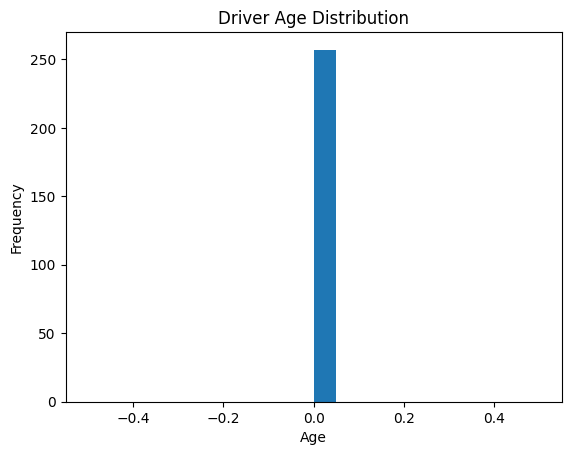

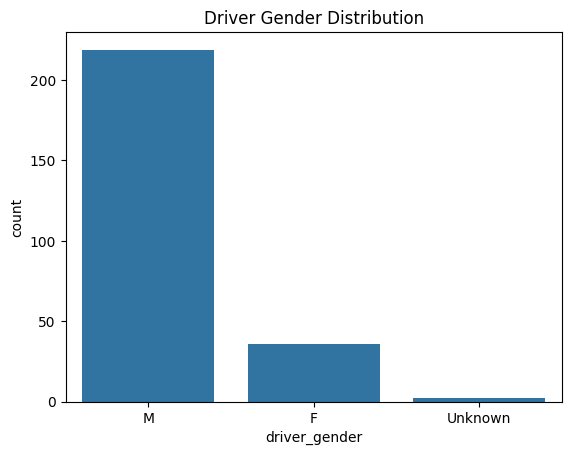

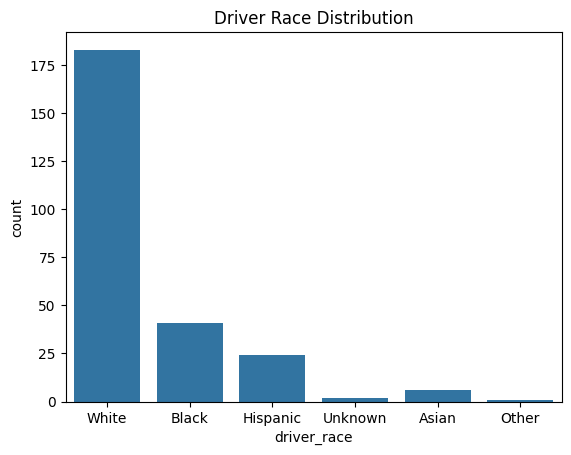

In [14]:
# Check the distribution of key features: Age distribution, gender distribution, and race distribution.
# Age Distribution

plt.hist(df['driver_age_raw'], bins=20)
plt.title('Driver Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Gender distribution
sns.countplot(x='driver_gender', data=df)
plt.title('Driver Gender Distribution')
plt.show()

# Race distribution
sns.countplot(x='driver_race', data=df)
plt.title('Driver Race Distribution')
plt.show()

/Users/rokhamt/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/rokhamt/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


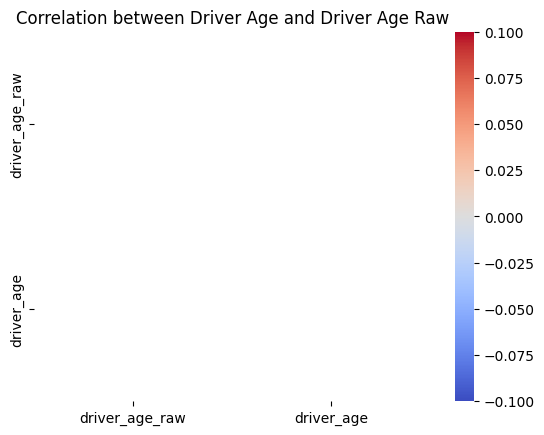

In [15]:
# Explore correlations Check how numerical features relate to each other.

corr = df[['driver_age_raw', 'driver_age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Driver Age and Driver Age Raw')
plt.show()

In [16]:
df['is_arrested']

146      False
281      False
331      False
455      False
748      False
         ...  
89375    False
90330    False
90767    False
91378    False
91553    False
Name: is_arrested, Length: 257, dtype: object

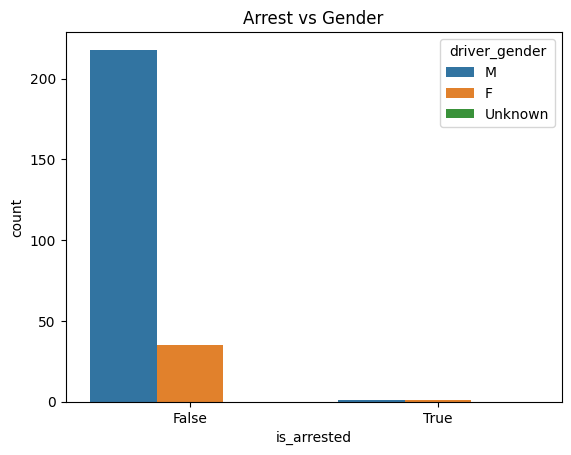

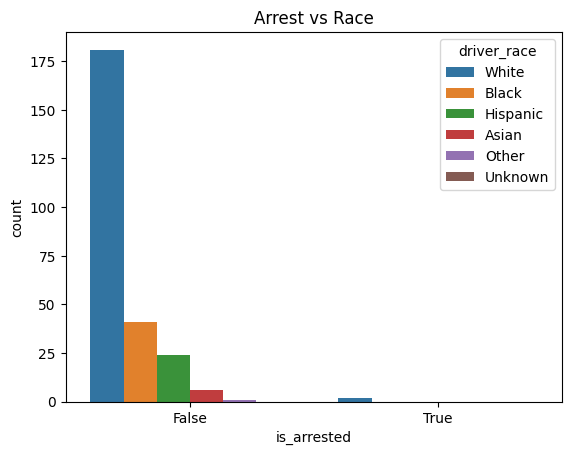

In [17]:
# Investigate relationships between features:How does arrest likelihood vary with age, gender, race, and violation type?

# Correct way to use countplot with 'data' passed explicitly
sns.countplot(x='is_arrested', hue='driver_gender', data=df)
plt.title('Arrest vs Gender')
plt.show()

# Plot for arrest vs race
sns.countplot(x='is_arrested', hue='driver_race', data=df)
plt.title('Arrest vs Race')
plt.show()


In [18]:
# Feature Engineering
# Next, we can create new features or modify existing ones to make our predictive model more effective.
# Age Binning: Divide the driver_age_raw into age groups (e.g., teen, adult, senior).

bins = [0, 18, 30, 45, 60, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
df['age_group'] = pd.cut(df['driver_age_raw'], bins=bins, labels=labels, right=False)

# Create dummy variables: Convert categorical features like driver_gender, driver_race, and violation 
# into numerical values (one-hot encoding).

df = pd.get_dummies(df,columns=['driver_gender', 'driver_race', 'violation'], drop_first= True)


# Build a Predictive Model

In [59]:
from sklearn.model_selection import train_test_split
# Let's now focus on building a model to predict whether a driver will be arrested (is_arrested).
# Split the Data: We’ll split the data into training and testing sets.

X = df.drop(columns = ['is_arrested', 'stop_date', 'stop_time']) # Features
y = df['is_arrested'] # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Classification Model: You can start with a simple logistic regression or decision tree classifier to predict arrests.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))